In [35]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [24]:
# Import dataset
df=pd.read_csv("data/breastcancer.csv")
df.shape
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [25]:
# Id set as index
data= df.set_index('Id')
data.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,benign
1002945,5,4,4,5,7,10,3,2,1,benign
1015425,3,1,1,1,2,2,3,1,1,benign
1016277,6,8,8,1,3,4,3,7,1,benign
1017023,4,1,1,3,2,1,3,1,1,benign


In [26]:
# labelencoding of our target column
labelencoder=preprocessing.LabelEncoder()
data['Classs']=labelencoder.fit_transform(data['Class'])
data.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class,Classs
Id,,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,benign,0
1002945,5,4,4,5,7,10,3,2,1,benign,0
1015425,3,1,1,1,2,2,3,1,1,benign,0
1016277,6,8,8,1,3,4,3,7,1,benign,0
1017023,4,1,1,3,2,1,3,1,1,benign,0


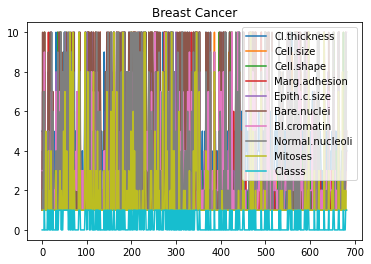

In [27]:
# Data visualization
# line chart of our dataset

columns = data.columns.drop(['Class'])
x_data = range(0, data.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, data[column], label=column)
ax.set_title('Breast Cancer')
ax.legend()
plt.show()

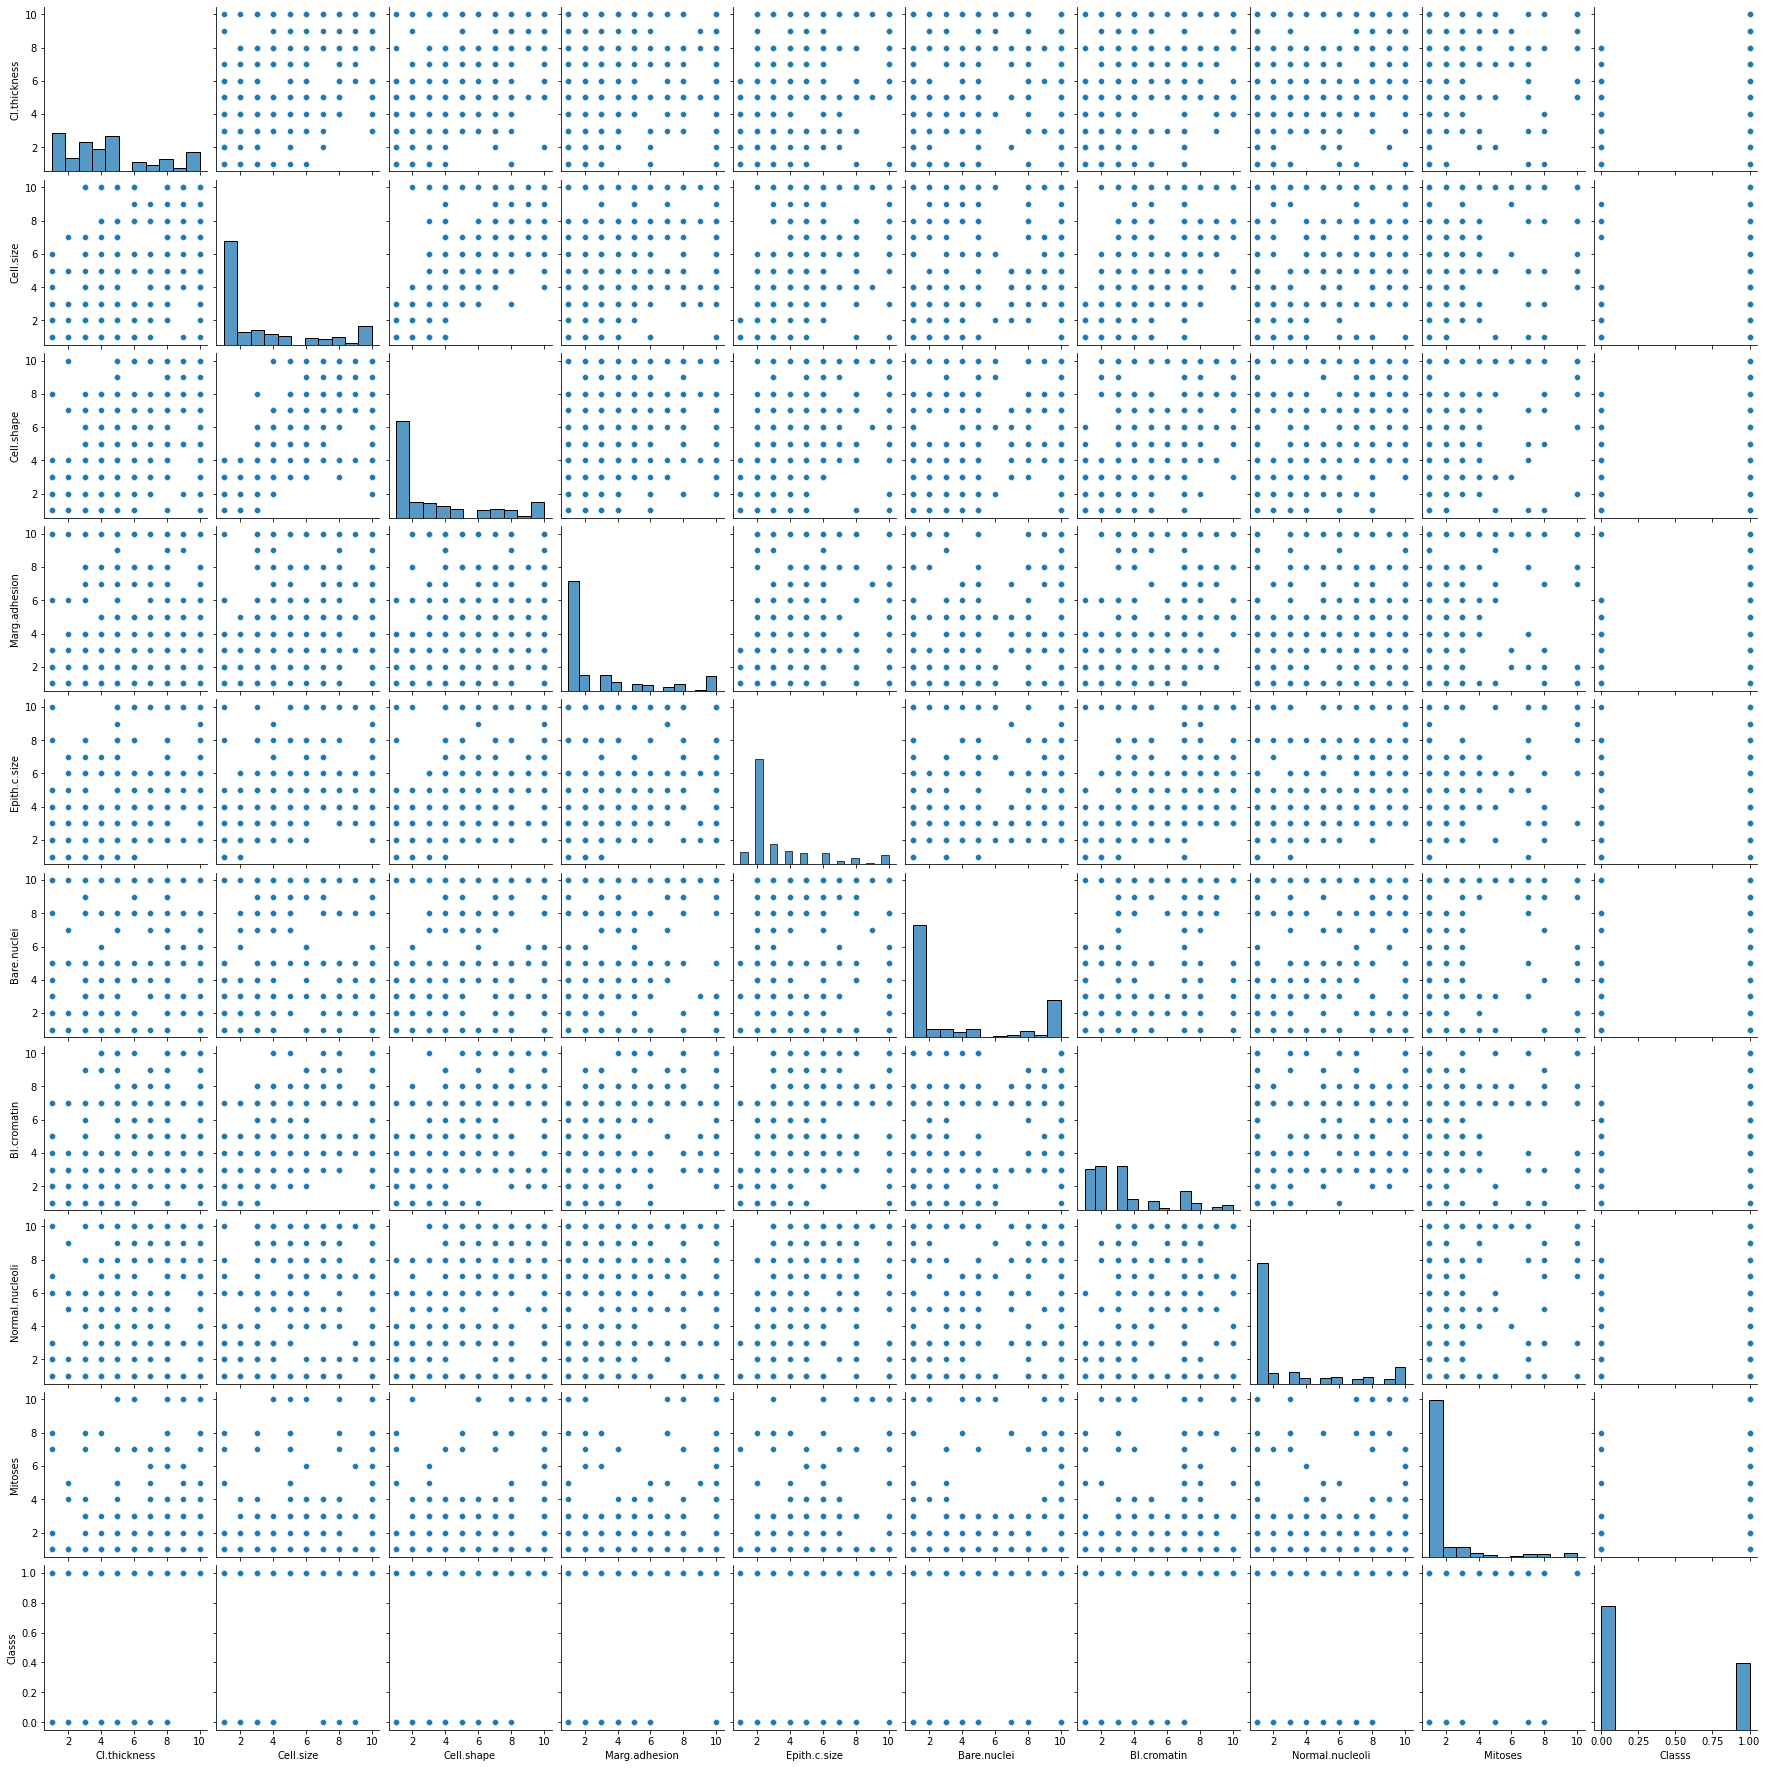

In [28]:
# plot grid of pairwise relationships in our dataset.
sns.pairplot(data)

In [29]:
# split data into x & y
# x for features
# y for target
x=data.iloc[:,:9]
y=data.iloc[:,10]


In [30]:
# split data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [31]:
# fit our train data into model through algorithm
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [32]:
# check model prediction through testing data 
y_prediction=classifier.predict(x_test)
y_prediction

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0])

In [33]:
# confusion matrix
confusion_matrix(y_test, y_prediction)

array([[84,  3],
       [ 3, 47]], dtype=int64)

In [34]:
# check accuracy of our model
accuracy_score(y_test, y_prediction)

0.9562043795620438

In [40]:
# check meean squared error
mean_squared_error(y_test, y_prediction)

0.043795620437956206